# COVID-19 Global Data Tracker

## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Data Loading and Exploration

### Loading Dataset

In [2]:
df = pd.read_csv('owid-covid-data.csv')

### Checking column names

In [3]:
print(df.columns)

Index(['country', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'excess_mortality', 'excess_mortality_cumulative',
       'excess_mortality_cumulative_absolute',
       'excess_mortality_cumulative_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'icu_patients',
       'icu_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'stringency_index',
       'reproduction_rate', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
    

### Preview rows

In [4]:
print(df.head())

       country        date  total_cases  new_cases  new_cases_smoothed  \
0  Afghanistan  2020-01-01          NaN        NaN                 NaN   
1  Afghanistan  2020-01-02          NaN        NaN                 NaN   
2  Afghanistan  2020-01-03          NaN        NaN                 NaN   
3  Afghanistan  2020-01-04          0.0        0.0                 NaN   
4  Afghanistan  2020-01-05          0.0        0.0                 NaN   

   total_cases_per_million  new_cases_per_million  \
0                      NaN                    NaN   
1                      NaN                    NaN   
2                      NaN                    NaN   
3                      0.0                    0.0   
4                      0.0                    0.0   

   new_cases_smoothed_per_million  total_deaths  new_deaths  ...  population  \
0                             NaN           NaN         NaN  ...  40578801.0   
1                             NaN           NaN         NaN  ...  40578801.0

### Identifying missing values

In [5]:
print(df.isnull().sum())

country                            0
date                               0
total_cases                    15254
new_cases                      17986
new_cases_smoothed             19201
                               ...  
extreme_poverty               184294
diabetes_prevalence            77971
handwashing_facilities        272448
hospital_beds_per_thousand    196443
human_development_index        98654
Length: 61, dtype: int64


## Data Cleaning

### Filtering countries of interest

In [6]:
countries = ['Germany', 'United States', 'India']
df_loc_filter = df[df['country'].isin(countries)]

### Dropping rows with missing critical values

In [7]:
critical_columns = ['date', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations', 'code']
df_missval_drop = df_loc_filter.dropna(subset=critical_columns)

### Converting date column to Datetime

In [8]:
df_missval_drop.loc[:, 'date'] = pd.to_datetime(df_missval_drop['date'])
df = df_missval_drop # Setting the filtered dataframe back to df for ease.

## Exploratory Data Analysis

### Plotting for total cases over time for selected countries

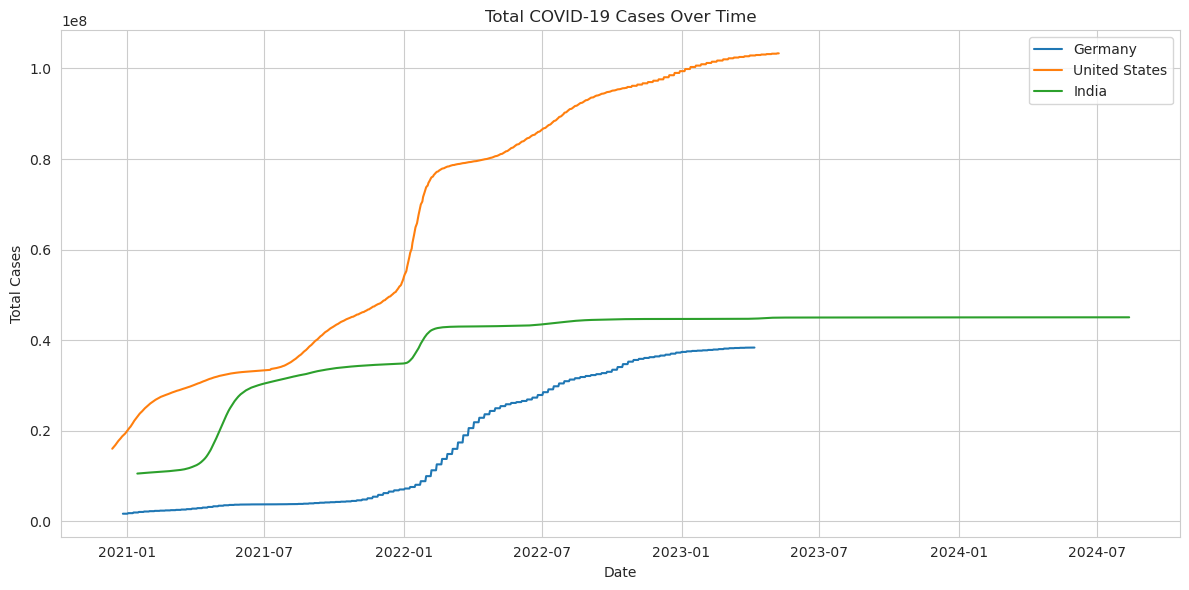

In [9]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

for country in countries:
    subset = df[df['country'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.tight_layout()
plt.show()

### Plotting for total deaths over time

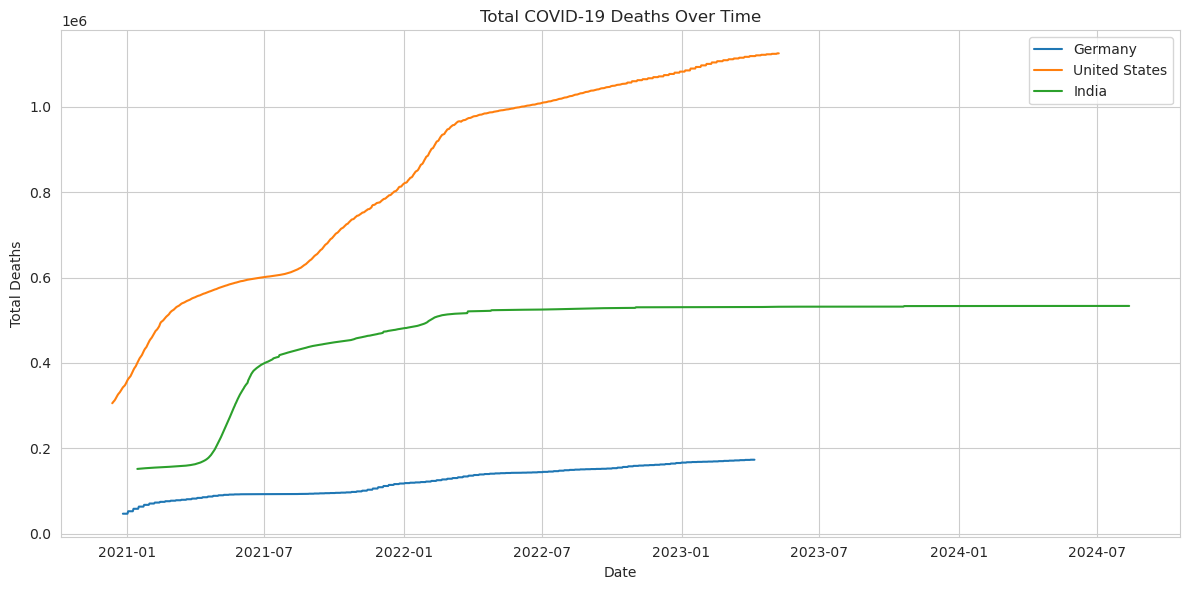

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

for country in countries:
    subset = df[df['country'] == country]
    plt.plot(subset['date'], subset['total_deaths'], label=country)

plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.tight_layout()
plt.show()

### Plotting for daily new cases

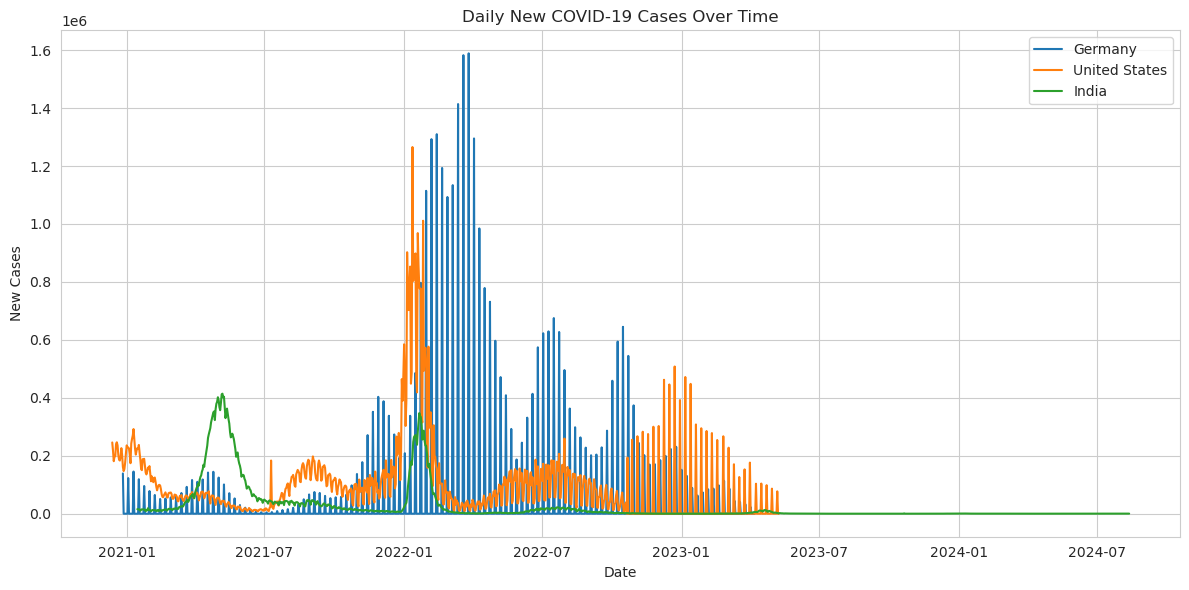

In [11]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

for country in countries:
    subset = df[df['country'] == country]
    plt.plot(subset['date'], subset['new_cases'], label=country)

plt.title('Daily New COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.tight_layout()
plt.show()

### Adding death rate column and plotting

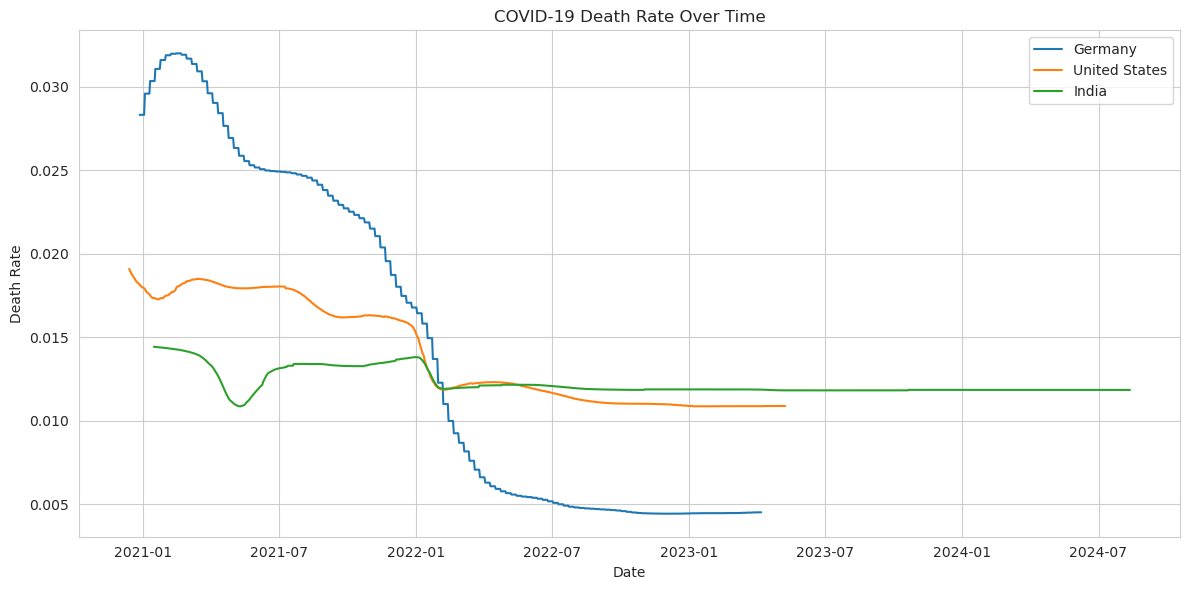

In [13]:
df.loc[:, 'death_rate'] = df['total_deaths'] / df['total_cases']

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

for country in countries:
    subset = df[df['country'] == country]
    plt.plot(subset['date'], subset['death_rate'], label=country)

plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.tight_layout()
plt.show()

## Visualizing Vaccination Process

### Plotting cumulative vaccinations over time

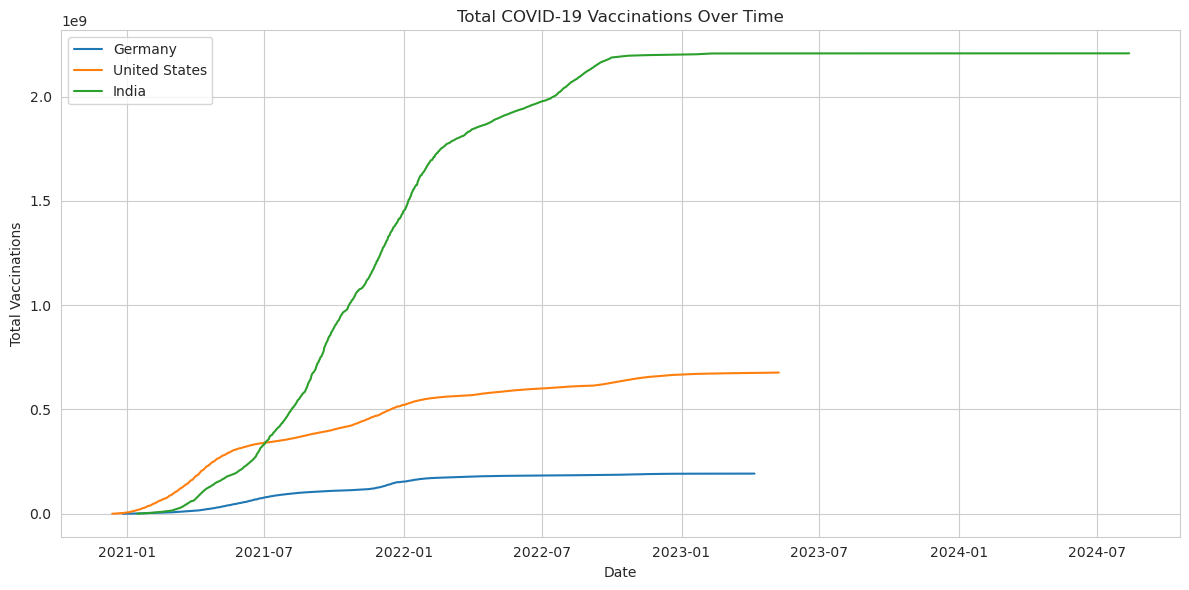

In [14]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

for country in countries:
    subset = df[df['country'] == country]
    plt.plot(subset['date'], subset['total_vaccinations'], label=country)

plt.title('Total COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.tight_layout()
plt.show()

### Plotting percentage of population vaccinated

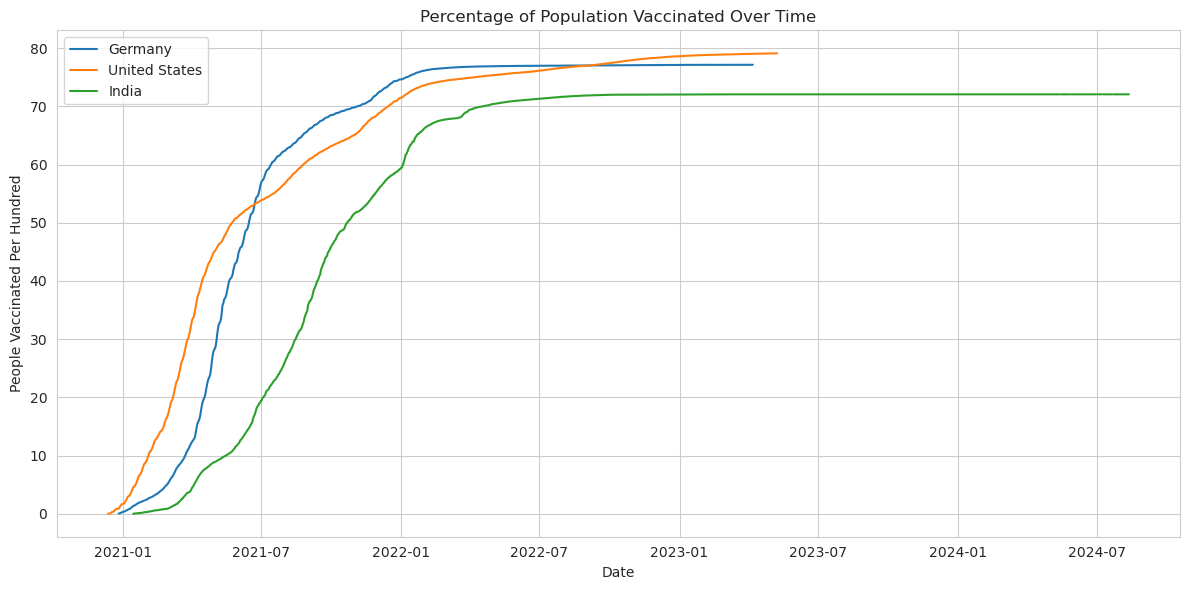

In [15]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

for country in countries:
    subset = df[df['country'] == country]
    plt.plot(subset['date'], subset['people_vaccinated_per_hundred'], label=country)

plt.title('Percentage of Population Vaccinated Over Time')
plt.xlabel('Date')
plt.ylabel('People Vaccinated Per Hundred')
plt.legend()
plt.tight_layout()
plt.show()

## Building a chloropleth map

In [16]:
latest_df = df.sort_values('date').groupby('country', as_index=False).last()

fig = px.choropleth(
    latest_df,
    locations='code',
    color='total_cases',
    hover_name='country',
    color_continuous_scale='Reds',
    title='Total COVID-19 Cases by Country (Latest Date)',
)

fig.show()